In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## NBA Players1996-2019

In [2]:
df=pd.read_csv('C:/Users/jason/downloads/all_seasons.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [3]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [4]:
df.describe(include = 'all')

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12305.000000,12305,12305,12305.000000,12305.000000,12305.000000,12305,12305,12305,12305,...,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305
unique,NaN,2463,36,NaN,NaN,NaN,347,82,47,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
top,NaN,Vince Carter,CLE,NaN,NaN,NaN,None,USA,Undrafted,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
freq,NaN,22,433,NaN,NaN,NaN,1789,10308,2224,7071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
mean,6152.000000,NaN,NaN,27.084518,200.611602,100.369926,NaN,NaN,NaN,NaN,...,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358,NaN
std,3552.291866,NaN,NaN,4.335868,9.146321,12.477150,NaN,NaN,NaN,NaN,...,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483,NaN
min,0.000000,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3076.000000,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,...,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000,NaN
50%,6152.000000,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,...,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000,NaN
75%,9228.000000,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,...,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000,NaN


# 缺失值檢查&處理

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
season,0,0.0
ast_pct,0,0.0
player_name,0,0.0
team_abbreviation,0,0.0
age,0,0.0
player_height,0,0.0
player_weight,0,0.0
college,0,0.0
country,0,0.0
draft_year,0,0.0


## 新增欄位:是否經過選秀

In [6]:
drafted=[]
for i in df['draft_year']:
    if i=='Undrafted':
        drafted.append('No')
    else:
        drafted.append('Yes')

In [7]:
drftedstat=pd.DataFrame(drafted)
drafted_stats=drftedstat.rename(columns={0:'drafted'})
drafted_stats['drafted'].value_counts()

Yes    10081
No      2224
Name: drafted, dtype: int64

In [8]:
df = pd.concat([df,drafted_stats],axis=1) 

## 新增欄位:是否為美國本土球員

In [9]:
is_american=[]
for i in df['country']:
    if i=='USA':
        is_american.append('Yes')
    else:
        is_american.append('No')

In [10]:
usa=pd.DataFrame(is_american)
isamerican=usa.rename(columns={0:'is_American'})
isamerican['is_American'].value_counts()

Yes    10308
No      1997
Name: is_American, dtype: int64

In [11]:
df = pd.concat([df,isamerican],axis=1) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [13]:
df['team_abbreviation'].value_counts()

CLE    433
TOR    428
MIA    426
LAC    424
DAL    422
WAS    422
ATL    421
PHI    420
HOU    418
SAS    413
DEN    412
ORL    411
LAL    411
NYK    410
IND    410
GSW    409
MIL    409
BOS    407
POR    407
CHI    406
DET    400
PHX    399
MIN    399
SAC    398
UTA    397
MEM    352
CHA    288
NJN    257
OKC    239
SEA    182
BKN    180
NOP    159
NOH    143
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

## 把以前的隊伍名稱改成現在對應的隊伍名稱

In [14]:
df = df.replace({'team_abbreviation' : {'NJN':'BKN', 'SEA':'OKC', 'NOH':'NOP','CHH':'CHA','VAN':'MEM','NOK':'NOP'}})
df['team_abbreviation'].value_counts()

BKN    437
CLE    433
TOR    428
MIA    426
LAC    424
MEM    424
WAS    422
DAL    422
ATL    421
OKC    421
PHI    420
HOU    418
SAS    413
DEN    412
ORL    411
LAL    411
NYK    410
IND    410
GSW    409
MIL    409
BOS    407
POR    407
CHI    406
DET    400
PHX    399
MIN    399
SAC    398
UTA    397
CHA    377
NOP    334
Name: team_abbreviation, dtype: int64

# 資料分析

### Heat Map

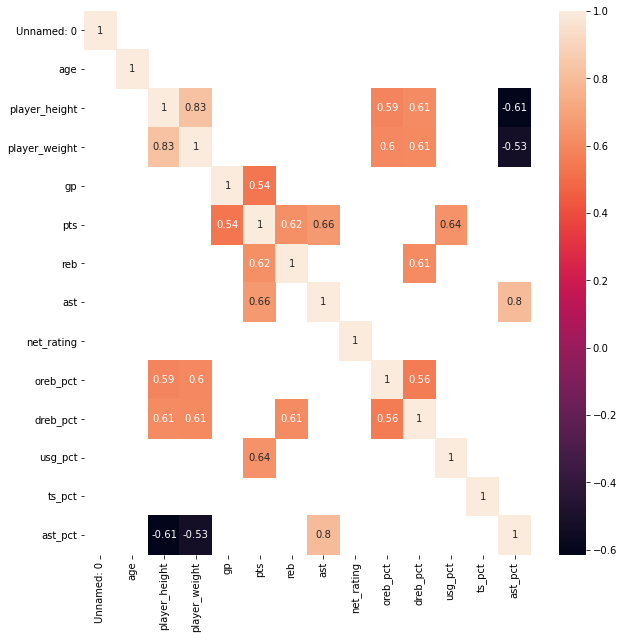

In [64]:
plt.figure(figsize=(10,10))
corr = df.corr()
corr = corr[abs(corr) > 0.5]
sns.heatmap(corr, annot=True)

### 聯盟每季球員人數長條圖

In [17]:
season_v = df.groupby("season")
season_v.size()

season
1996-97    441
1997-98    439
1998-99    439
1999-00    438
2000-01    441
2001-02    440
2002-03    428
2003-04    442
2004-05    464
2005-06    458
2006-07    458
2007-08    451
2008-09    445
2009-10    442
2010-11    452
2011-12    478
2012-13    469
2013-14    482
2014-15    492
2015-16    476
2016-17    486
2017-18    540
2018-19    530
2019-20    529
2020-21    540
2021-22    605
dtype: int64

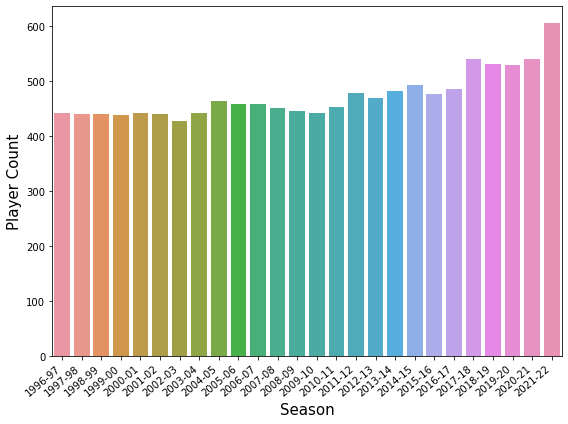

In [43]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "season", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Season',fontsize=15)
plt.ylabel('Player Count',fontsize=15)
plt.tight_layout()
plt.show()

### 各隊人數(總計)

In [35]:
team = df.groupby("team_abbreviation")
team.size()

team_abbreviation
ATL    421
BKN    180
BOS    407
CHA    288
CHH     89
CHI    406
CLE    433
DAL    422
DEN    412
DET    400
GSW    409
HOU    418
IND    410
LAC    424
LAL    411
MEM    352
MIA    426
MIL    409
MIN    399
NJN    257
NOH    143
NOK     32
NOP    159
NYK    410
OKC    239
ORL    411
PHI    420
PHX    399
POR    407
SAC    398
SAS    413
SEA    182
TOR    428
UTA    397
VAN     72
WAS    422
dtype: int64

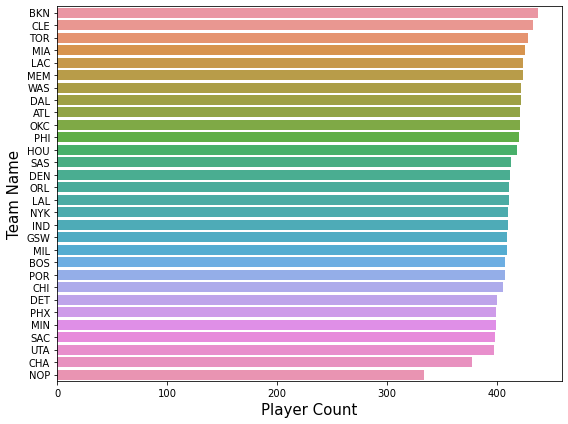

In [15]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=df['team_abbreviation'],data=df,order=df['team_abbreviation'].value_counts().index)
plt.xlabel('Player Count',fontsize=15)
plt.ylabel('Team Name',fontsize=15)
plt.tight_layout()
plt.show()

### 每季各隊平均球員身高、體重、年齡

In [45]:
avg_height = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['player_height'].mean())
avg_height

,team_abbreviation,season,player_height
0,ATL,1996-97,203.797647
1,ATL,1997-98,199.231250
2,ATL,1998-99,199.571429
3,ATL,1999-00,201.246154
4,ATL,2000-01,200.025000
...,...,...,...
767,WAS,2017-18,201.168000
768,WAS,2018-19,201.328421
769,WAS,2019-20,197.878095
770,WAS,2020-21,200.095556


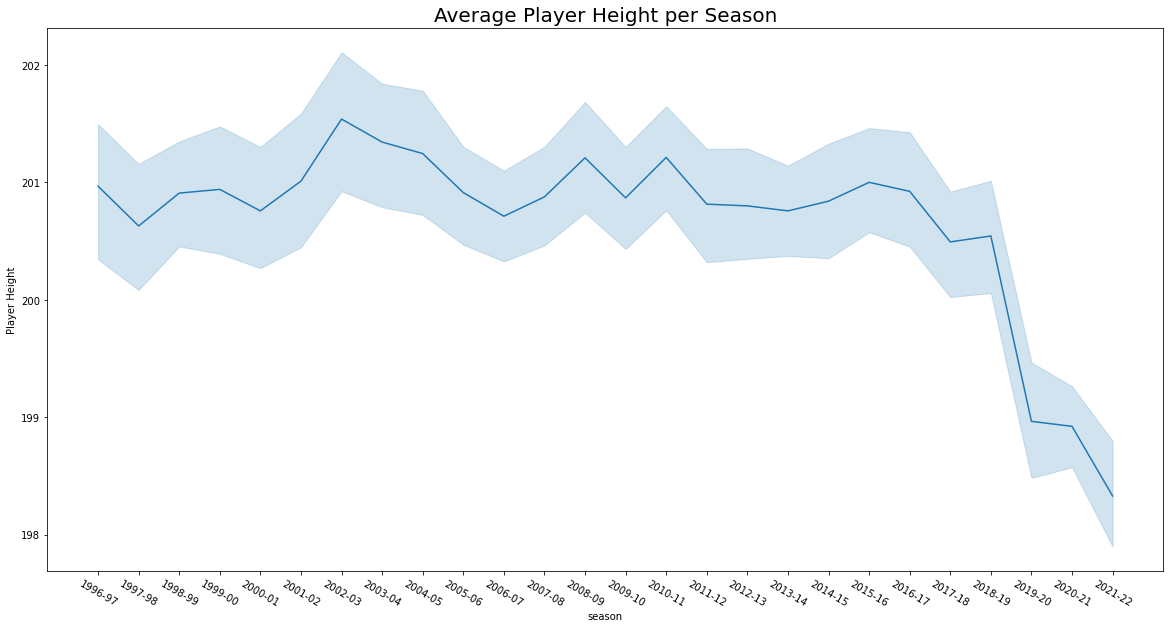

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'player_height', data=avg_height)
plt.xticks(rotation=-30)
plt.ylabel('Player Height')
plt.title('Average Player Height per Season', fontsize=20)
plt.show()

In [47]:
avg_weight = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['player_weight'].mean())
avg_weight

,team_abbreviation,season,player_weight
0,ATL,1996-97,103.098793
1,ATL,1997-98,99.166551
2,ATL,1998-99,100.470628
3,ATL,1999-00,100.662532
4,ATL,2000-01,97.890823
...,...,...,...
767,WAS,2017-18,97.945633
768,WAS,2018-19,99.933480
769,WAS,2019-20,96.723094
770,WAS,2020-21,97.749076


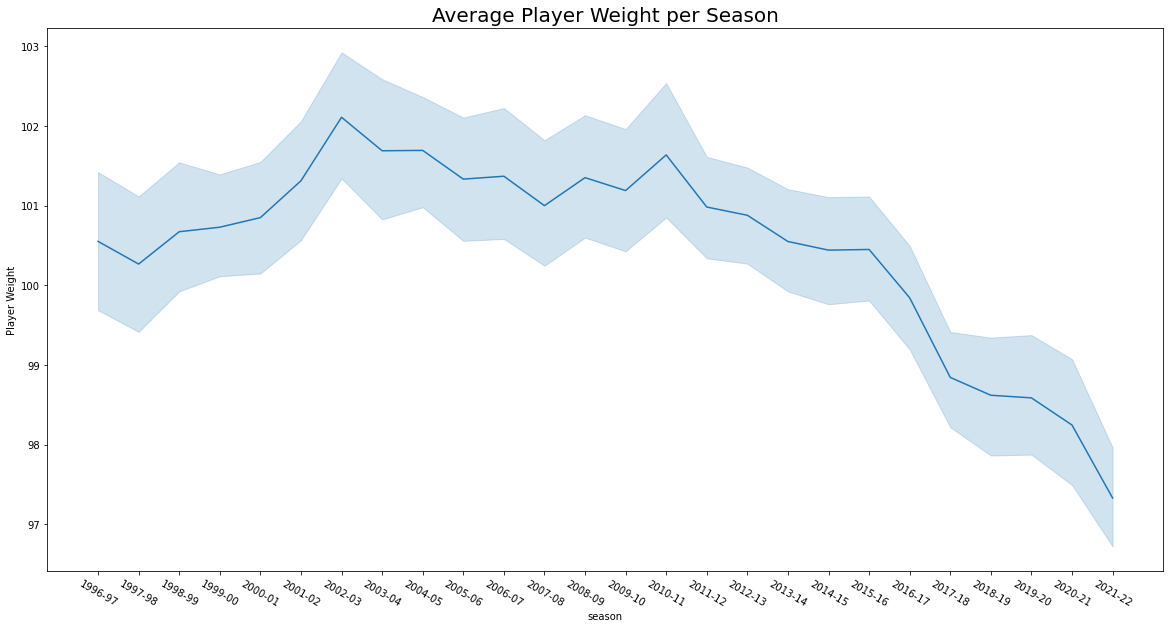

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'player_weight', data=avg_weight)
plt.xticks(rotation=-30)
plt.ylabel('Player Weight')
plt.title('Average Player Weight per Season', fontsize=20)
plt.show()

In [51]:
avg_age = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['age'].mean())
avg_age

,team_abbreviation,season,age
0,ATL,1996-97,27.529412
1,ATL,1997-98,28.250000
2,ATL,1998-99,28.500000
3,ATL,1999-00,26.692308
4,ATL,2000-01,26.187500
...,...,...,...
767,WAS,2017-18,27.600000
768,WAS,2018-19,26.894737
769,WAS,2019-20,25.619048
770,WAS,2020-21,26.000000


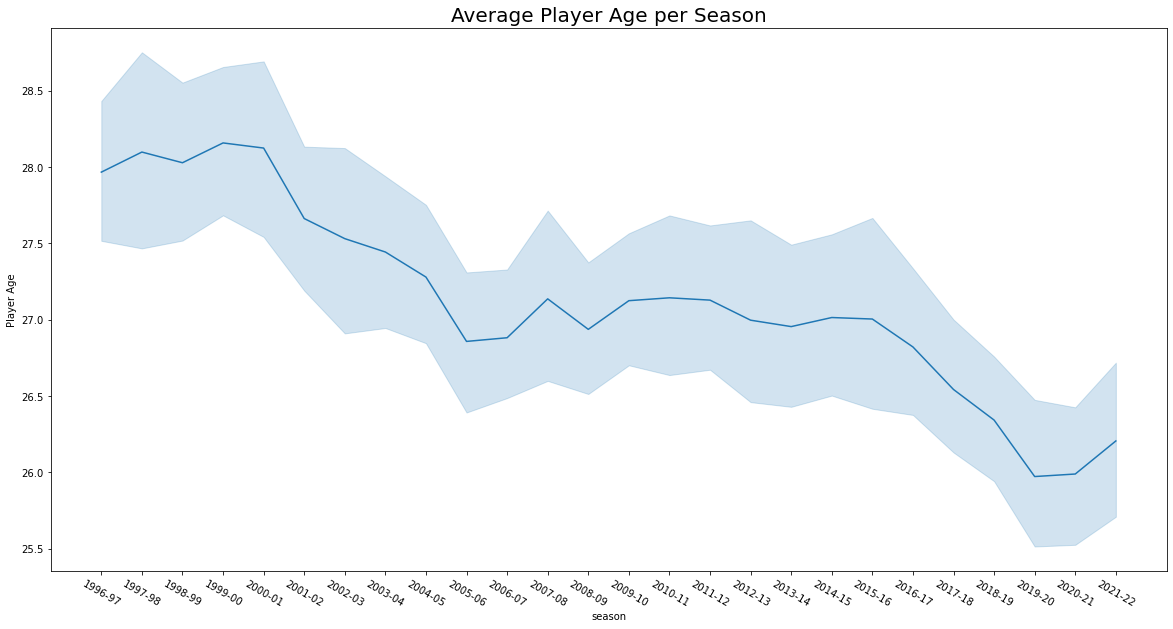

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'age', data=avg_age)
plt.xticks(rotation=-30)
plt.ylabel('Player Age')
plt.title('Average Player Age per Season', fontsize=20)
plt.show()

# 想法:
新增欄位(打了幾季、平均出賽數、場均幾分幾板幾助.etc)，做country、college的圖

## 獨立一個只有單一球員姓名的df

In [18]:
players_unique = df.drop_duplicates(subset='player_name')
players_unique

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,is_American
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Yes,Yes
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,Yes,Yes
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,Yes,Yes
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,Yes,Yes
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,12285,McKinley Wright IV,MIN,23.0,180.34,87.089664,Colorado,USA,Undrafted,Undrafted,...,0.6,-25.8,0.000,0.000,0.082,0.833,0.231,2021-22,No,Yes
12291,12291,Matt Ryan,BOS,25.0,200.66,97.522280,Tennessee-Chattanooga,USA,Undrafted,Undrafted,...,0.0,25.0,0.000,0.000,0.357,0.300,0.000,2021-22,No,Yes
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22,Yes,No
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22,No,Yes


### 各球員所屬國家、大學、賽季相關資料

In [10]:
players_unique['country'].value_counts() #跟season一起做，看每年有多少比例的非美國人

USA                    2067
Canada                   39
France                   35
Australia                19
Croatia                  15
                       ... 
US Virgin Islands         1
Angola                    1
U.S. Virgin Islands       1
Trinidad and Tobago       1
Ireland                   1
Name: country, Length: 80, dtype: int64

In [30]:
players_unique['is_American']=='Yes'

0         True
1         True
2         True
3         True
4         True
         ...  
12285     True
12291     True
12299    False
12303     True
12304     True
Name: is_American, Length: 2463, dtype: bool

ValueError: shape mismatch: objects cannot be broadcast to a single shape

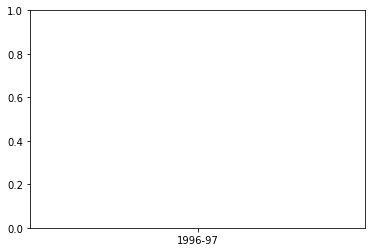

In [28]:
plt.bar(players_unique['season'],(players_unique['is_American']=='Yes').value_counts(), color='blue')
plt.bar(players_unique['season'],(players_unique['is_American']=='No').value_counts(), bottom=count(players_unique['is_American']=='Yes').value_counts(), color='red')
plt.show()

In [12]:
players_unique['college'].value_counts() #取前十做圖

None                345
Kentucky             74
Duke                 60
UCLA                 50
Kansas               50
                   ... 
Siena                 1
Navy                  1
Tennessee Tech        1
Chicago St.           1
Georgia Southern      1
Name: college, Length: 327, dtype: int64

draft_year跟season一樣的為新秀，再新增一個欄位判斷

In [11]:
players_unique['draft_year'].value_counts()

Undrafted    736
2019          69
2020          60
2017          58
2018          58
2011          57
1998          57
2016          56
2012          56
2005          55
2014          54
2021          53
2006          52
2010          51
2000          50
2008          50
2009          50
2013          50
2001          49
2002          48
2007          48
1999          48
1995          47
1996          47
2004          47
1997          47
2003          47
2015          44
1994          42
1992          36
1990          32
1993          31
1988          29
1991          26
1989          23
1987          23
1985          21
1986          18
1983          10
1984           9
1981           7
1982           6
1979           2
1963           1
1978           1
1980           1
1976           1
Name: draft_year, dtype: int64